# <center>***Big Data***</center>
# <center>***Lab N°2: Spark***</center>

<center> © ENSIAS - IDSIT - Novembre 2023</center>




---





#I.   Spark Basics



Spark applications run as independent sets of processes on a cluster, coordinated by the SparkContext object in your main program (called the driver program).

Specifically, to run on a cluster, the SparkContext can connect to several types of cluster managers (either Spark’s own standalone cluster manager, Mesos, YARN or Kubernetes), which allocate resources across applications. Once connected, Spark acquires executors on nodes in the cluster, which are processes that run computations and store data for your application. Next, it sends your application code (defined by JAR or Python files passed to SparkContext) to the executors. Finally, SparkContext sends tasks to the executors to run.

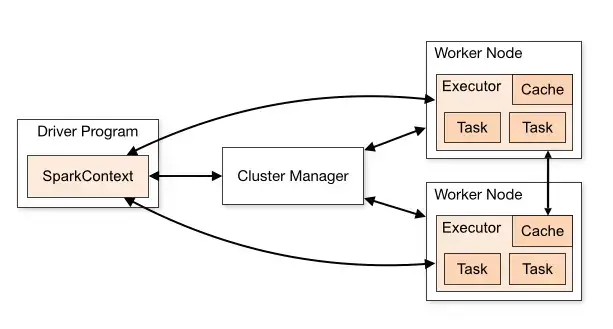

In [37]:
#!unzip news_topic_model.zip

Archive:  news_topic_model.zip
   creating: news_topic_model/
  inflating: news_topic_model/extra.json  
   creating: news_topic_model/data/
  inflating: news_topic_model/data/_SUCCESS  
  inflating: news_topic_model/data/part-00000-4e4924c5-1643-4f06-baab-e844e2be3728-c000.snappy.parquet  
  inflating: news_topic_model/data/.part-00000-4e4924c5-1643-4f06-baab-e844e2be3728-c000.snappy.parquet.crc  
  inflating: news_topic_model/data/._SUCCESS.crc  
   creating: news_topic_model/metadata/
  inflating: news_topic_model/metadata/_SUCCESS  
  inflating: news_topic_model/metadata/._SUCCESS.crc  
  inflating: news_topic_model/metadata/part-00000  
  inflating: news_topic_model/metadata/.part-00000.crc  
  inflating: news_topic_model/topics.json  


PySpark is a python API for Spark. It can be exploited  for local usage or as a client to connect to a cluster instead of setting up a cluster itself. PySpark is included in the official releases of Spark available in the Apache Spark website.

In [1]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=8c4e8d80caa1acfb2785542b5639ba8a0b3a0f00ea331e2a5291d4b57eb93eb4
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


The code below allows to run Spark locally with one worker thread (that is, no parallelism)

In [12]:
from pyspark import SparkContext
from pyspark.conf import SparkConf
from pyspark.sql import SparkSession

#conf = (SparkConf().setAppName("example_1").setMaster('local'))
# # To run Spark locally with K worker threads. (Ideally, set this to the number of cores on your host.):
conf = (SparkConf().setAppName("MyApp"))
# # To run spark using a YARN cluster manage:
# conf = (SparkConf().setAppName("example_3").setMaster('yarn').set('spark.driver.memory', '1G'))

sc = SparkContext(conf=conf)
spark = SparkSession(sc)
spark

In [13]:
#sc.stop()

The instructions below return the wordcount results for the text in Hello.txt

In [14]:

import re
from operator import add

#parallelisation
#lines = spark.read.text("file:///home/starias/Downloads/Hello.txt").rdd.map(lambda r: r[0].lower())



# Loading the log file
#log_file = sc.textFile("file:///home/starias/Downloads/Hello.txt")
#parallelisation
lines = spark.read.text("Hello.txt").rdd.map(lambda r: r[0].lower())
#print(lines)

counts = lines.flatMap(lambda x: re.split(r'[_:-;,.\s]\s*|\'|’|“|"|\s+|(|) ', x)).map(lambda x: (x, 1)).reduceByKey(add)
output = counts.collect()
for (word, count) in output:
  print("%s: %i" % (word, count))

hello: 5
None: 12
world: 2
spark: 3
and: 2
python: 3
are: 1
powerful: 1
again: 1


In [15]:
#spark.stop()

***Complete the lab 1 and get data form speech.txt located in wordcount folder of HDFS file system. To ensure communication between both sessions of lab1 and lab2, you must get the server address of lab1 and replace localhost by this address in the HDFS path of the file speech.txt***



#II.   Spark Streaming (DStreams)


Spark Streaming is an extension of the core Spark API that enables scalable, high-throughput, fault-tolerant stream processing of live data streams. Data can be ingested from many sources like Kafka, Kinesis, or TCP sockets, and can be processed using complex algorithms expressed with high-level functions like map, reduce, join and window. Finally, processed data can be pushed out to filesystems, databases, and live dashboards. In fact, you can apply Spark’s machine learning and graph processing algorithms on data streams.

Spark Streaming is the previous generation of Spark’s streaming engine. There are no longer updates to Spark Streaming and it’s a legacy project. There is a newer and easier to use streaming engine in Spark called Structured Streaming. You should use Spark Structured Streaming for your streaming applications and pipelines. [**See Structured Streaming Programming Guide**](https://spark.apache.org/docs/latest/structured-streaming-programming-guide.html).


Below is a basic example of using spark streaming to retrieve data sent over the network via a socket managed by a python server



In [16]:
!python spark.py & python server.py &


########
#Server#
########
# from pyspark import SparkContext
# from pyspark.streaming import StreamingContext
# import time
# import socket

# server = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
# server.setsockopt(socket.IPPROTO_TCP, socket.TCP_NODELAY, 1)
# server.bind(('localhost', 1201))

# server.listen()

# client, address = server.accept()
# print("new connection from: "+ str(address))
# client.sendall("first lab on apache spark\n".encode())
# time.sleep(10)
# client.sendall("apache spark can be used without apache hadoop\n".encode())
# time.sleep(10)
# client.sendall(" end of spark client\n".encode())
# time.sleep(10)
# #client.close()


##############
#Spark client#
##############
# from multiprocessing import Process
# from multiprocessing import Pool

# from pyspark import SparkContext
# from pyspark.streaming import StreamingContext
# import time
# import socket


# # Create a local StreamingContext with two working thread and batch interval of 1 second
# sc = SparkContext("local[2]", "NetworkWordCount")
# ssc = StreamingContext(sc, 10)
# # Create a DStream that will connect to hostname:port, like localhost:9999
# lines = ssc.socketTextStream("localhost", 1201)
# # Split each line into words
# words = lines.flatMap(lambda line: line.split(" "))
# # Count each word in each batch
# pairs = words.map(lambda word: (word, 1))
# wordCounts = pairs.reduceByKey(lambda x, y: x + y)
# # Print the first ten elements of each RDD generated in this DStream to the console
# wordCounts.pprint()
# ssc.start()             # Start the computation
# ssc.awaitTermination()  # Wait for the computation to terminate



python3: can't open file '/content/server.py': [Errno 2] No such file or directory
python3: can't open file '/content/spark.py': [Errno 2] No such file or directory


#III.   Structured Streaming (DataFrame)

Structured Streaming is a scalable and fault-tolerant stream processing engine built on the Spark SQL engine. You can express your streaming computation the same way you would express a batch computation on static data. The Spark SQL engine will take care of running it incrementally and continuously and updating the final result as streaming data continues to arrive. You can use the Dataset/DataFrame API in Scala, Java, Python or R to express streaming aggregations, event-time windows, stream-to-batch joins, etc. The computation is executed on the same optimized Spark SQL engine. Finally, the system ensures end-to-end exactly-once fault-tolerance guarantees through checkpointing and Write-Ahead Logs. In short, Structured Streaming provides fast, scalable, fault-tolerant, end-to-end exactly-once stream processing without the user having to reason about streaming.

Below is a basic example of using spark structured streaming to retrieve data sent over the network via a socket managed by a python server. The result of the processing is regenerated for all data recived from the begining of the communication between the server and the client (unlike spark streaming which does the procession just for the new recived records)

In [17]:
!python spark.py & python server.py &

#########
#Spark#
#######
# from pyspark.sql import SparkSession
# from pyspark.sql.functions import explode
# from pyspark.sql.functions import split
# import time
# import socket
# print('Start Spark Streaming ...')
# spark = SparkSession\
#     .builder\
#     .appName("StructuredNetworkWordCount")\
#     .getOrCreate()

# # Create DataFrame representing the stream of input lines from connection to host:port
# lines = spark\
#     .readStream\
#     .format('socket')\
#     .option('host', "localhost")\
#     .option('port', 4523)\
#     .load()

# # Split the lines into words
# words = lines.select(
#     # explode turns each item in an array into a separate row
#     explode(
#         split(lines.value, ' ')
#     ).alias('word')
# )

# # Generate running word count
# wordCounts = words.groupBy('word').count()

# # Start running the query that prints the running counts to the console
# query = wordCounts\
#     .writeStream\
#     .outputMode('complete')\
#     .format('console')\
#     .start()

# query.awaitTermination()


########
#Server#
########
#from pyspark import SparkContext
#from pyspark.streaming import StreamingContext
#import time
#import socket


# server = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
# server.setsockopt(socket.IPPROTO_TCP, socket.TCP_NODELAY, 1)
# server.bind(('localhost', 4523))

# server.listen()

# client, address = server.accept()
# print("new connection from: "+ str(address))
# client.sendall("first lab on apache spark\n".encode())
# print("sending...")
# time.sleep(30)
# print("ok...")
# client.sendall("apache spark can be used without apache hadoop\n".encode())
# print("sending...")
# time.sleep(30)
# print("ok...")
# client.sendall(" end of spark client\n ".encode())
# print("sending...")
# time.sleep(30)
# print("ok...")
# #client.close()


python3: can't open file '/content/server.py': [Errno 2] No such file or directory
python3: can't open file '/content/spark.py': [Errno 2] No such file or directory


#IV. Application: Realtime Processing of News

##IV.1. Data collection

###*1.   Google News API*




In [18]:
#https://pypi.org/project/GoogleNews
!pip install GoogleNews
!pip install newspaper3k

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.1/211.1 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.6/97.6 kB 11.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 49.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13538 sha256=7e0a9e51857c316b3dfa4eae537f496e8fe86fb856118ed9aedce6a13d95e619
  Stored in directory: /root/.cache/pip/wheels/c8/d6/6c/384f58df48c00b9a31d638005143b5b3ac62c3d25fb1447f23
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-py3-none-any.whl size=3340 sha256=9eb11c5c67af3ad9e0ec6dcdea9662044933e0ba300d457004f9100ccd1e6b73
  S

In [19]:
'''
Good API for getting News from several data sources
There is a search limit on the number of news in this api.
The maximum number of news we can gather is 10
Documentations:https://medium.com/analytics-vidhya/googlenews-api-live-news-from-google-news-using-python-b50272f0a8f0
'''

from GoogleNews import GoogleNews
from newspaper import Article
import pandas as pd

#get new for a given date range
#googlenews=GoogleNews(start='05/01/2020',end='05/31/2020')

#get new for previous days
googlenews=GoogleNews(period='7d')

#get new for previous hourses
#googlenews=GoogleNews(period='1h')

#get new for previous minutes
#googlenews=GoogleNews(period='30min')

#Search for news about specific topic
googlenews.search('erdogan')

#get Result
result=googlenews.result()

#print results
df=pd.DataFrame(result)
print(df.all)
print(type(result))


<bound method NDFrame._add_numeric_operations.<locals>.all of                                                title            media  \
0  Dar reiterates invitation to President Erdogan...   RADIO PAKISTAN   
1         Deputy PM Dar Meets With President Erdogan        UrduPoint   
2  Venezuela, Turkey sign gold deal in region hit...     The New Arab   
3     Erdoğan presents new ‘moral’ education program   Turkish Minute   
4                     Why Turkey wants to join Brics  Middle East Eye   
5  Assistant to Azerbaijani President Anar Alakba...         AzerNews   
6  Erdogans cosmic pride! Turkey to send second a...            Fakti   
7  It’s good that Erdoğan skiped the White House ...    Yetkin Report   
8  President Erdogan extends best wishes to Türki...        TRT World   
9  President Erdogan extends best wishes to Türki...      Head Topics   

            date                   datetime  \
0  5 minutes ago 2024-06-08 17:42:05.115708   
1  5 minutes ago 2024-06-08 17:42:05.125

###*2.   NewsAPI*

In [20]:
#https://newsapi.org/
!pip install newsapi-python

In [21]:
'''
Good API for getting News from several data sources
not suitable for realtime news.
Documentations:https://github.com/mattlisiv/newsapi-python
'''
#Usage
from newsapi import NewsApiClient

# Init
newsapi = NewsApiClient(api_key='8308c1e8b30640468c1be43719b78124')

#newsapi = NewsApiClient(api_key='f6cca8a85c1e4114b05f78c1e2c4edae')

# top-headlines
# top_headlines = newsapi.get_top_headlines(q='bitcoin',
#                                           sources='bbc-news,the-verge',
#                                           category='business',
#                                           language='en',
#                                           country='us')

# top-headlines/sources
# sources = newsapi.get_sources()


# Everything

newsapi.request_method
all_articles = newsapi.get_everything(q='erdogan',
                                      #from_param='2023-11-04',
                                      from_param='2024-05-08',
                                      to='2024-06-08',
                                      language='en',
                                      sort_by='relevancy',
                                      page=1,page_size=100)

for article in all_articles['articles']:
  print(article["title"])

Turkey's Erdogan says U.S., Europe not doing enough to pressure Israel into Gaza truce
Turkey’s Erdogan meets Greek PM, sees ‘no unsolvable problems’ in ties
Automattic’s Turkish Delight: A Rare Win Against Erdogan’s Censorship
Greece's prime minister in Turkey for talks as the regional rivals seek to improve relations
US Wars Are Making Türkiye’s Relationship With the West Politically Untenable
[Removed]
Muslims must unite against Israel – Erdogan
World reacts to Slovakia Prime Minister Robert Fico being shot
Recep Tayyip Erdogan: More Than 1,000 Hamas Terrorists Received Treatment in Turkish Hospitals
Erdogan dismisses secular criticism on Turkey's new curriculum
[Removed]
A new coup attempt in Türkiye: Who wants Erdogan gone?
Erdogan Warns that Israel will come for Turkish Territory after Taking Gaza
[Removed]
Turkish President Erdoğan Says The Eurovision Song Contest Is A Danger To The Traditional Family
[Removed]
Delusional Israel will target Turkey next, Erdogan warns
'We Know Wh

In [22]:
type(all_articles['articles'])

list

In [23]:
len(all_articles['articles'])

100

In [24]:
all_articles.keys()

dict_keys(['status', 'totalResults', 'articles'])

In [25]:
all_articles['status']

'ok'

In [26]:
all_articles['articles'][0].keys()

dict_keys(['source', 'author', 'title', 'description', 'url', 'urlToImage', 'publishedAt', 'content'])

In [27]:
all_articles['articles'][0]

{'source': {'id': None, 'name': 'Yahoo Entertainment'},
 'author': None,
 'title': "Turkey's Erdogan says U.S., Europe not doing enough to pressure Israel into Gaza truce",
 'description': None,
 'url': 'https://consent.yahoo.com/v2/collectConsent?sessionId=1_cc-session_8f1518d3-ad15-4043-aae7-d79044a23e03',
 'urlToImage': None,
 'publishedAt': '2024-05-12T18:11:37Z',
 'content': "If you click 'Accept all', we and our partners, including 238 who are part of the IAB Transparency &amp; Consent Framework, will also store and/or access information on a device (in other words, use … [+678 chars]"}

The article source is a dictionary with id and name

Let us extract just the name of the source.

In [ ]:
#articles=all_articles['articles']
articles=sc.parallelize(all_articles['articles'],numSlices=8)

# Remove the id from the source
update_article = lambda article: {**article, 'source': article['source']['name']}

updated_articles = articles.map(update_article).collect()


updated_articles

In [ ]:
len(updated_articles)

In [30]:
updated_articles[1]

{'source': 'Al Jazeera English',
 'author': 'Al Jazeera',
 'title': 'Turkey’s Erdogan meets Greek PM, sees ‘no unsolvable problems’ in ties',
 'description': "On visit to Ankara, Greece's Prime Minister Kyriakos Mitotakis says leaders 'wish to intensify our bilateral contacts'.",
 'url': 'https://www.aljazeera.com/news/2024/5/13/turkeys-erdogan-meets-greek-pm-sees-no-unsolvable-problems-in-ties',
 'urlToImage': 'https://www.aljazeera.com/wp-content/uploads/2024/05/2024-05-13T162020Z_1740306665_RC2SP7A3T8PG_RTRMADP_3_TURKEY-GREECE-1715621077.jpg?resize=1920%2C1440',
 'publishedAt': '2024-05-13T17:51:54Z',
 'content': 'Turkish President Recep Tayyip Erdogan told Greek Prime Minister Kyriakos Mitotakis that there were no unsolvable problems between their countries as the leaders met in Ankara.\r\nTurkey and Greece hav… [+5491 chars]'}

##IV.2. Data analysis

### 1. Import necessary modules

In [76]:
import numpy as np

from pyspark.ml.clustering import LocalLDAModel
from pyspark.ml.feature import StopWordsRemover, Tokenizer
from pyspark.sql.types import *
from pyspark.sql.functions import lower, col,regexp_replace,trim,concat_ws,udf
from pyspark.ml.feature import CountVectorizer, IDF
import json

import time
from nltk.sentiment import SentimentIntensityAnalyzer
#from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
#from collections import Counter
from nltk import download,WordNetLemmatizer
from pyspark.ml.feature import StopWordsRemover, Tokenizer
from pyspark.sql.types import *
download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### 2. Load the LDA pretrained model for topic modeling

In [78]:
# Load the model
lda_model = LocalLDAModel.load('news_topic_model')

lda_model

LocalLDAModel: uid=LDA_aa7f50f63c85, k=30, numFeatures=73411

In [79]:
print("Loaded model parameters:")
for param, value in lda_model.extractParamMap().items():
    print(f"  {param.name}: {value}")

Loaded model parameters:
  checkpointInterval: 10
  featuresCol: features
  k: 30
  keepLastCheckpoint: True
  learningDecay: 0.51
  learningOffset: 1024.0
  maxIter: 20
  optimizeDocConcentration: True
  optimizer: online
  seed: 0
  subsamplingRate: 0.05
  topicDistributionCol: topicDistribution


In [65]:
# Specify the file name
file_name = 'news_topic_model/extra.json'

# Read the data from the JSON file
with open(file_name, 'r') as json_file:
    data = json.load(json_file)

print(data)

# Accessing individual elements
minDF = data["minDF"]
vocabulary_size = data["vocabulary_size"]

print(f"minDF: {minDF}")
print(f"Vocabulary Size: {vocabulary_size}")

{'minDF': 3.0, 'vocabulary_size': 128622}
minDF: 3.0
Vocabulary Size: 128622


In [66]:
#!rm -rf news_topics_detection_model

In [67]:
# Specify the file name
file_name = 'news_topic_model/topics.json'

# Read the data from the JSON file
with open(file_name, 'r') as json_file:
    topics = json.load(json_file)

topics

{'0': ['best',
  'space',
  'national',
  'administration',
  'recipe',
  'aeronautics',
  'ever',
  'date',
  'charles',
  'herbert'],
 '1': ['change',
  'climate',
  'pope',
  'trump',
  'francis',
  'take',
  'hope',
  'small',
  '2016',
  'movement'],
 '2': ['coronavirus',
  'covid19',
  'case',
  'update',
  'new',
  '2020',
  'death',
  'concern',
  'report',
  '30'],
 '3': ['vitamin',
  'better',
  'happy',
  'become',
  '24hour',
  'interval',
  'tie',
  'shopping',
  'day',
  'fresh'],
 '4': ['law',
  'cause',
  'sex',
  'problem',
  'china',
  'learn',
  'stay',
  'aid',
  'winter',
  'serve'],
 '5': ['lost',
  'lesson',
  'weight',
  'final',
  'biden',
  'angle',
  'joe',
  'meditation',
  'hour',
  'hollywood'],
 '6': ['great',
  'dog',
  'taylor',
  'kingdom',
  'obama',
  'talking',
  'unwashed',
  'security',
  'track',
  'britain'],
 '7': ['clinton',
  'hillary',
  'name',
  'hotel',
  'vaccine',
  'really',
  'monophosphate',
  'deoxyadenosine',
  'town',
  'san'],
 '

In [68]:
topics = lda_model.describeTopics()
topics.show()


+-----+--------------------+--------------------+
|topic|         termIndices|         termWeights|
+-----+--------------------+--------------------+
|    0|[31, 137, 101, 31...|[0.00985414811177...|
|    1|[107, 195, 330, 3...|[0.01330611945988...|
|    2|[30, 16, 57, 216,...|[0.01347184457240...|
|    3|[379, 205, 622, 4...|[0.00632639774673...|
|    4|[133, 282, 103, 4...|[0.00819584782418...|
|    5|[673, 430, 776, 6...|[0.00602703665300...|
|    6|[100, 123, 958, 8...|[0.01240321325915...|
|    7|[230, 328, 366, 3...|[0.01068304711893...|
|    8|[389, 541, 235, 5...|[0.00606431922978...|
|    9|[26, 56, 312, 174...|[0.02147667718198...|
|   10|[21, 3, 36, 191, ...|[0.01721008314916...|
|   11|[46, 2, 352, 169,...|[0.01180906612486...|
|   12|[179, 114, 397, 5...|[0.01102264094365...|
|   13|[534, 335, 765, 7...|[0.00627261569473...|
|   14|[426, 386, 575, 7...|[0.00693743278268...|
|   15|[694, 175, 584, 1...|[0.00462890601493...|
|   16|[814, 537, 737, 1...|[0.00570331910335...|


In [69]:
vectorizer = CountVectorizer(inputCol="description_filtered", outputCol="raw_features", vocabSize=vocabulary_size, minDF=minDF)
idf = IDF(inputCol="raw_features", outputCol="features")

In [100]:
download('vader_lexicon')
download('punkt')
download('stopwords')
# Initialize News API client
newsapi = NewsApiClient(api_key='8308c1e8b30640468c1be43719b78124')

# Define function to retrieve news articles periodically
def retrieve_news(subject, sources, num_articles=100):
    articles = []
    for source in sources:
        response = newsapi.get_everything(q=subject, sources=source, language='en', page_size=num_articles)
        articles.extend(response['articles'])

    #print(articles)
    #print(type(articles))

    articles=sc.parallelize(all_articles['articles'],numSlices=10)

    # Remove the id from the source
    update_article = lambda article: {**article, 'source': article['source']['name'] }


    # Update the article
    articles = articles.map(update_article).collect()

    articles=spark.createDataFrame(articles)

    return articles

def tokenize(articles):
    tokenizer = Tokenizer(inputCol="description_cleaned", outputCol="words")

    return tokenizer.transform(articles)

lemmatizer = WordNetLemmatizer()


# Broadcast the lemmatizer to all workers
lemmatizer_broadcast = spark.sparkContext.broadcast(lemmatizer)

# Define a UDF to lemmatize tokens

def lemmatize_tokens(tokens):
    lemmatizer = lemmatizer_broadcast.value
    return [lemmatizer.lemmatize(token) for token in tokens]

lemmatize_udf = udf(lemmatize_tokens, ArrayType(StringType()))

def lemmatize(tokenized_articles):
    # Apply the lemmatization UDF
    df_lemmatized =tokenized_articles.withColumn("lemmas", lemmatize_udf(col("words")))
    return df_lemmatized

def stopwords_removal(lemmatized_articles):
    remover = StopWordsRemover(inputCol="lemmas", outputCol="description_filtered")
    filtered_data = remover.transform(lemmatized_articles)
    return filtered_data


def clean(articles):

    replacements = {
        '[Removed]': None,
        ' https://removed.com': None
    }
    articles = articles.na.replace(replacements)

    articles=articles.na.drop(subset=['url','content','description'])

    articles = articles.withColumn("description_cleaned",
                           trim(
                               regexp_replace(
                                   regexp_replace(col("description"), r'[^a-zA-Z0-9\s]', ''),
                                   r'\s+', ' ')
                               )
                           )

    articles = articles.withColumn("description_cleaned", lower(col("description_cleaned")))

    return articles

def transform(articles,to_str=True):
    # Tokenization
    tokenized_data=tokenize(articles)

    # Lemmatization
    lemmatized_data=lemmatize(tokenized_data)



    # Stopwords removal
    stop_words = set(stopwords.words('english'))
    filtered_data=stopwords_removal(lemmatized_data)

    if to_str:
        filtered_data = filtered_data.withColumn( "description_filtered_str",concat_ws(" ", "description_filtered"))

    return filtered_data




def preprocess(articles,to_str=True):
    cleaned_data=clean(articles)
    transformed_data=transform(cleaned_data,to_str=to_str)

    return transformed_data

def feauture_engineering(preprocessed_data):
    # Fit the CountVectorizer
    cv_model = vectorizer.fit(preprocessed_data)

    # Transform the data
    df_vectorized = cv_model.transform(preprocessed_data)
    #df_vectorized.show(truncate=False)


    # Fit the IDF model
    idf_model = idf.fit(df_vectorized)

    # Transform the data
    df_final = idf_model.transform(df_vectorized)


    return df_final

    # Define function to analyze sentiment of news articles

# Initialize SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Define a function to calculate sentiment polarity score
def get_sentiment_score(text):
    if text:
        return sia.polarity_scores(text)['compound']
    else:
        return None

# Define a UDF for the sentiment analysis function
sentiment_udf = udf(get_sentiment_score, DoubleType())

# Define function to analyze sentiment of news articles and add the sentiment score to the DataFrame
def analyze_sentiment(preprocessed_data):
    # Add a new column with sentiment scores
    preprocessed_data = preprocessed_data.withColumn("sentiment_score", sentiment_udf(preprocessed_data["description_filtered_str"]))



    return preprocessed_data

# Define the UDF to find the index of the max value in the array
def max_index(topicDistribution):
    return int(np.argmax(topicDistribution))

# Register the UDF with Spark
max_index_udf = udf(max_index, IntegerType())

def get_topic_distribution(preprocessed_data):

    data=feauture_engineering(preprocessed_data)
    topics_distribution=lda_model.transform(data)
    topics_distribution.show()
    # Apply the UDF to create a new column with the index of the max item in topicDistribution
    topics_distribution = topics_distribution.withColumn("most_dominant_topic", max_index_udf(topics_distribution.topicDistribution))

    return topics_distribution

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
if __name__ == "__main__":
    subject = 'COVID-19'
    sources = ['bbc-news', 'cnn', 'reuters']

    while True:

        # Retrive the articles
        articles = retrieve_news(subject, sources)

        # Preprocess the articles
        articles=preprocess(articles)


        # Perform sentiment analysis
        articles = analyze_sentiment(articles)

        # Get topic distribution
        articles=get_topic_distribution(articles)
        # Drop unnecessary columns
        columns_to_drop = ['description_cleaned', 'description_filtered_str', 'words', 'lemmas', 'raw_features']
        articles = articles.select([column for column in articles.columns if column not in columns_to_drop])

        # Show the fimal dataframe
        articles.show()


        print('Sleeping for 5s')
        time.sleep(5)  # Repeat every 5s

        #break  # Uncomment to avoid infinite loop for testing


+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+------------------------+---------------+--------------------+--------------------+--------------------+
|              author|             content|         description|         publishedAt|              source|               title|                 url|          urlToImage| description_cleaned|               words|              lemmas|description_filtered|description_filtered_str|sentiment_score|        raw_features|            features|   topicDistribution|
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+------------------------+------

In [72]:
# Stop the application
#sc.stop()